In [1]:
import pandas as pd
file_path = 'IHME_DAH_DATABASE_1990_2020_Y2021M09D22.CSV'
chunksize = 100000 
df_csv = pd.concat(pd.read_csv(file_path, chunksize=chunksize, encoding="utf-8", low_memory=False))

In [2]:
cols_to_convert = df_csv.columns[14:]
df_csv[cols_to_convert] = df_csv[cols_to_convert].apply(pd.to_numeric, errors='coerce')

In [3]:
print(df_csv.head())

   year     source  channel recipient_isocode recipient_country  \
0  1990  Australia  BIL_AUS               AGO            Angola   
1  1990  Australia  BIL_AUS               BDI           Burundi   
2  1990  Australia  BIL_AUS               BEN             Benin   
3  1990  Australia  BIL_AUS               BFA      Burkina Faso   
4  1990  Australia  BIL_AUS               BWA          Botswana   

   gbd_location_id wb_regioncode  wb_location_id  \
0              168           SSA             242   
1              175           SSA             242   
2              200           SSA             242   
3              201           SSA             242   
4              193           SSA             242   

                     gbd_region  gbd_region_id  ... other_dah_20  rmh_dah_20  \
0   Sub-Saharan Africa, Central          167.0  ...          0.0         5.0   
1   Sub-Saharan Africa, Eastern          174.0  ...          0.0         6.0   
2   Sub-Saharan Africa, Western          199

In [4]:
print(df_csv.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384306 entries, 0 to 384305
Data columns (total 76 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   year                   384306 non-null  int64  
 1   source                 384306 non-null  object 
 2   channel                384306 non-null  object 
 3   recipient_isocode      384306 non-null  object 
 4   recipient_country      383773 non-null  object 
 5   gbd_location_id        384306 non-null  int64  
 6   wb_regioncode          370318 non-null  object 
 7   wb_location_id         384306 non-null  int64  
 8   gbd_region             383993 non-null  object 
 9   gbd_region_id          383993 non-null  float64
 10  gbd_superregion        383993 non-null  object 
 11  gbd_superregion_id     383993 non-null  float64
 12  elim_ch                384306 non-null  int64  
 13  prelim_est             384306 non-null  int64  
 14  dah_20                 330001 non-nu

In [5]:
print(df_csv.describe())

                year  gbd_location_id  wb_location_id  gbd_region_id  \
count  384306.000000    384306.000000   384306.000000  383993.000000   
mean     2008.127521      1765.935533     2240.752439    1745.812671   
std         6.945191      8325.915434     9204.906147    8328.525983   
min      1990.000000         1.000000      239.000000       1.000000   
25%      2004.000000       110.000000      241.000000      96.000000   
50%      2009.000000       169.000000      242.000000     159.000000   
75%      2014.000000       200.000000      242.000000     192.000000   
max      2020.000000     44598.000000    44621.000000   44598.000000   

       gbd_superregion_id        elim_ch     prelim_est        dah_20  \
count       383993.000000  384306.000000  384306.000000  3.300010e+05   
mean          1733.144388       0.252052       0.014358  2.519363e+03   
std           8330.949734       0.434191       0.118963  3.669331e+04   
min              1.000000       0.000000       0.000000 -1.

In [6]:
mean_dah = df_csv["dah_20"].mean()
print(f"Srednia pomoc w latach 1990-2020 wyniosła w k$ {mean_dah}")

Srednia pomoc w latach 1990-2020 wyniosła 2519.3625352650447


In [7]:
df_csv.dropna(subset=["dah_20"], inplace=True)
median_dah = df_csv["dah_20"].median()
print(f"Mediana pomocy w obszarze zdrowia wyniosła {median_dah}")

Mediana pomocy w obszarze zdrowia wyniosła 44.0


In [9]:
std_dah = df_csv["dah_20"].std()
print(f"Odchylenie standardowe pomocy w obszarze zdrowia wyniosło {std_dah}")

Odchylenie standardowe pomocy w obszarze zdrowia wyniosło 36693.31180470732


In [10]:
missing_values = df_csv.isnull().sum()
print("Brakujące wartości w każdej kolumnie:")
print(missing_values)

Brakujące wartości w każdej kolumnie:
year                          0
source                        0
channel                       0
recipient_isocode             0
recipient_country           521
                          ...  
mal_dah_20                14960
tb_dah_20                 15339
swap_hss_total_dah_20     16049
oid_dah_20                21227
unalloc_dah_20           140458
Length: 76, dtype: int64


In [11]:
#wypełnianie wartości brakujących wartościami średnimi w przypadku tego datasetu nie ma sensu
df_csv.dropna(subset=["hiv_dah_20"], inplace=True)

In [13]:
Q1 = df_csv["dah_20"].quantile(0.25)
Q3 = df_csv["dah_20"].quantile(0.75)
IQR = Q3-Q1
outliers = df_csv[(df_csv["dah_20"] < (Q1-1.5*IQR)) | (df_csv["dah_20"] > (Q3+1.5*IQR))]
print("Wartości odstające")
print(outliers)
                        

Wartości odstające
        year         source  channel recipient_isocode  \
15      1990      Australia  BIL_AUS               ERI   
26      1990      Australia  BIL_AUS            INKIND   
49      1990      Australia  BIL_AUS               PNG   
65      1990      Australia  BIL_AUS               TLS   
70      1990      Australia  BIL_AUS               VNM   
...      ...            ...      ...               ...   
384301  2020  United_States   UNICEF               QZA   
384302  2020  United_States  UNITAID               QZA   
384303  2020  United_States  UNITAID               QZA   
384304  2020  United_States   WB_IDA               QZA   
384305  2020  United_States      WHO               QZA   

              recipient_country  gbd_location_id wb_regioncode  \
15                      Eritrea              178           SSA   
26      Administrative expenses            44598           NaN   
49             Papua New Guinea               26           EAP   
65                  

In [15]:
correlation = df_csv['dah_20'].corr(df_csv['hiv_dah_20'])
print("Współczynnik korelacji:", correlation)

Współczynnik korelacji: 0.8308245442028445


<Axes: xlabel='dah_20', ylabel='hiv_dah_20'>

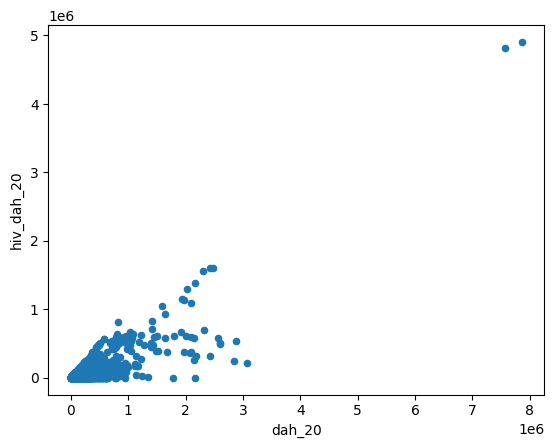

In [16]:
df_csv.plot.scatter(x = 'dah_20', y = 'hiv_dah_20')

In [17]:
df_csv['other_diseases_dah_20'] = ( df_csv['oid_other_dah_20'] + df_csv['tb_other_dah_20'] + df_csv['mal_other_dah_20'] + df_csv['hiv_other_dah_20'] + df_csv['ncd_other_dah_20'])

In [19]:
grouped = df_csv.groupby('recipient_country')['dah_20'].mean(numeric_only=True)
print('srednia pomoc dla danego kraju')
print(grouped)

srednia pomoc dla danego kraju
recipient_country
Administrative expenses      11703.161571
Afghanistan                   1736.564483
Albania                        281.901707
Algeria                         82.570909
Angola                         664.607132
                                 ...     
Vietnam                       1669.274224
Wallis and Futuna Islands      456.464286
Yemen                          859.378356
Zambia                        2222.785955
Zimbabwe                      1506.333514
Name: dah_20, Length: 174, dtype: float64


In [21]:
df_sorted = df_csv.sort_values(by = 'dah_20', ascending=False)
print("Dane posortowane według wysokości pomocy")
print(df_sorted.head())

Dane posortowane według wysokości pomocy
        year         source  channel recipient_isocode  \
384290  2020  United_States  BIL_USA               QZA   
383776  2019  United_States  BIL_USA               QZA   
383827  2020           BMGF     BMGF               QZA   
361639  2017  Private_other      NGO               QZA   
383276  2019           BMGF     BMGF               QZA   

              recipient_country  gbd_location_id wb_regioncode  \
384290  Unallocated/Unspecified            44598           NaN   
383776  Unallocated/Unspecified            44598           NaN   
383827  Unallocated/Unspecified            44598           NaN   
361639  Unallocated/Unspecified            44598           NaN   
383276  Unallocated/Unspecified            44598           NaN   

        wb_location_id               gbd_region  gbd_region_id  ...  \
384290           44621  Unallocated/Unspecified        44598.0  ...   
383776           44621  Unallocated/Unspecified        44598.0  ...   
